Reference : https://github.com/philipperemy/keras-tcn/blob/master/tasks/time_series_forecasting.py

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense
from tcn import TCN

In [2]:
data = pd.read_csv('data.csv', index_col=0, parse_dates=True)

In [3]:
data.head()

,milk_production_pounds
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [4]:
len(data)

168

In [5]:
# Creating supervised training dataset
data = data.values
lookback_window = 12  # months.
x = []
y = []
for i in range(lookback_window, len(data)):
    x.append(data[i - lookback_window:i])
    y.append(data[i])
x = np.array(x)
y = np.array(y)

In [6]:
print(x.shape)
print(y.shape)

(156, 12, 1)
(156, 1)


TCN model = https://github.com/philipperemy/keras-tcn

In [7]:
# Create model using Keras functional model api
i = Input(shape=(lookback_window, 1))
m = TCN()(i)
m = Dense(1, activation='linear')(m)
model = Model(inputs=[i], outputs=[m])

model.summary()
model.compile('adam', 'mae')

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12, 1)]           0         
_________________________________________________________________
tcn (TCN)                    (None, 64)                91136     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 91,201
Trainable params: 91,201
Non-trainable params: 0
_________________________________________________________________


In [8]:
print('Train...')
model.fit(x, y, epochs=100, verbose=1)

Train...
Epoch 1/100
5/5 [==============================] - 0s 17ms/step - loss: 13793.1904
Epoch 2/100
5/5 [==============================] - 0s 18ms/step - loss: 2868.1423
Epoch 3/100
5/5 [==============================] - 0s 16ms/step - loss: 435.8367
Epoch 4/100
5/5 [==============================] - 0s 17ms/step - loss: 168.7280
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 165.8906
Epoch 6/100
5/5 [==============================] - 0s 16ms/step - loss: 275.9423
Epoch 7/100
5/5 [==============================] - 0s 16ms/step - loss: 237.1177
Epoch 8/100
5/5 [==============================] - 0s 17ms/step - loss: 193.7779
Epoch 9/100
5/5 [==============================] - 0s 17ms/step - loss: 203.4632
Epoch 10/100
5/5 [==============================] - 0s 17ms/step - loss: 216.6291
Epoch 11/100
5/5 [==============================] - 0s 17ms/step - loss: 185.9947
Epoch 12/100
5/5 [==============================] - 0s 18ms/step - loss: 195.7380
Epoch 13/100


In [9]:
predictions = model.predict(x)

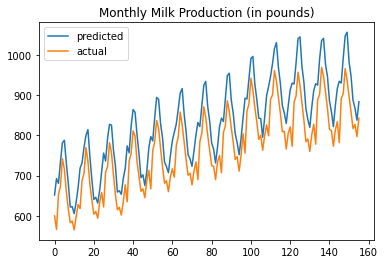

In [10]:
plt.plot(predictions)
plt.plot(y)
plt.title('Monthly Milk Production (in pounds)')
plt.legend(['predicted', 'actual'])
plt.show()